In [2]:
import pandas as pd
import csv
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 50)
csv.field_size_limit(500 * 1024 * 1024)

131072

In [3]:
df_twitter = pd.read_csv('./1006/twitter_affiliate_tweets.csv', engine = 'python')

In [4]:
df_twitter

,tweet,user,date,search,urls,isAffiliate,affiliate_url_count
0,Addiction and Mental Health Treatment - 1-866-...,https://twitter.com/addictionquoter,2022-07-14 04:19:34+00:00,addiction,"['https://t.co/bPY9dVe8NC', 'https://t.co/6xAt...",1,1
1,라필루스 데뷔곡 HIT YA 떼창 열풍넘치는 중독성 Rapilus debut s...,https://twitter.com/yeonye4,2022-07-14 04:09:18+00:00,addiction,['https://t.co/tdXVc3Ha1E'],1,1
2,NCB charges Rhea Chakraborty with abetting Sus...,https://twitter.com/sawhneyrohit9,2022-07-14 03:42:54+00:00,addiction,['https://t.co/leteLQnBpu'],1,1
3,Rev. Kenneth McCoy tends to his congregation i...,https://twitter.com/stlpublicradio,2022-07-14 03:31:01+00:00,addiction,['https://t.co/6GFnJt6ocD'],1,1
4,Addiction and Mental Health Treatment - 1-866-...,https://twitter.com/addictionquoter,2022-07-14 03:25:20+00:00,addiction,"['https://t.co/nsKgHeB9z0', 'https://t.co/6da1...",1,1
...,...,...,...,...,...,...,...
12293,Whitni Thomas explains Triodos' social investm...,https://twitter.com/SocInv_SmChange,2022-07-11 13:26:48+00:00,Investment,['https://t.co/fAgW41aDes'],1,1
12294,Stay ahead of the curve as TechCrunch editors ...,https://twitter.com/_DrFrusci,2022-07-11 13:26:03+00:00,Investment,['https://t.co/0qqUoTM6Gw'],1,1
12295,How to Maximize #Rental #Property #Investments...,https://twitter.com/handsonreinvest,2022-07-11 13:25:18+00:00,Investment,"['https://t.co/tOxSAqFR7y', 'https://t.co/3N6U...",1,1
12296,Marathon Digital Holdings Inc MARA Investment ...,https://twitter.com/marketcycles,2022-07-11 13:25:06+00:00,Investment,['https://t.co/hdvH4a26km'],1,1


12298条affiliate tweets来自4869名不同的用户

In [5]:
df_twitter.user.nunique()

4869

9名用户发布了100条以上的affiliate tweets

In [7]:
df_twitter.user.value_counts().head(20)

https://twitter.com/pluggrr            323
https://twitter.com/cheapprr           304
https://twitter.com/deallrr            300
https://twitter.com/tweets_worthy      236
https://twitter.com/SixStringDeals     131
https://twitter.com/StealsandDeals     126
https://twitter.com/tgdealsofficial    123
https://twitter.com/DealBeeOfficial    114
https://twitter.com/L5dmaC             103
https://twitter.com/getthatrightgtr     87
https://twitter.com/MyhticDeals         86
https://twitter.com/HelpFindCoupons     82
https://twitter.com/eZangaInc           75
https://twitter.com/FatKidDeals         75
https://twitter.com/addictionquoter     74
https://twitter.com/ServiceDirectHQ     66
https://twitter.com/DigitalMarketM      63
https://twitter.com/ESportsMed          61
https://twitter.com/paypercallcom       55
https://twitter.com/dealsandalert       54
Name: user, dtype: int64

Top 10共发布了1847条affiliate tweets，占总数的15.02%

- 时间差计算

In [10]:
df_afcomments_groupby_user=df_twitter.groupby('user')

In [14]:
import time
from datetime import datetime

def date_time_str_to_long(input_date_time_string):
    # 2022-07-14 05:06:45+00:00
    dt = datetime.strptime(input_date_time_string, '%Y-%m-%d %H:%M:%S+00:00')
    timeStamp = dt.timestamp()
    return timeStamp


def date_time_count(startTime, endTime):
    '''
    计算两个时间之间的差值，精确到秒
    :param startTime:
    :param endTime:
    :return:
    '''
    spent_times = int(date_time_str_to_long(endTime)) - int(date_time_str_to_long(startTime))
    # print('endTime={},startTime={},时间差值={}'.format(endTime, startTime, spent_times))
    return spent_times

In [15]:
from tqdm import tqdm

df_time_delta=pd.DataFrame(columns=['user', 'minDelta', 'maxDelta', 'commentDates','deltas', 'commentCount'])

for user, group in tqdm(df_afcomments_groupby_user):  # 遍历.DataFrameGroupBy对象
    # print(user, len(group))
    # 所有评论发布的时间
    comments_date=[]
    deltas=[]
    for i in range(len(group)):
        comments_date.append(group.iloc[i, 2])
    comments_date = sorted(comments_date)
    # 计算差值
    for i in range(len(comments_date)-1, 0, -1):
        delta=date_time_count(comments_date[i-1], comments_date[i])
        deltas.append(delta)
    mi, ma = None, None
    if deltas:
        mi=min(deltas)
        ma=max(deltas)
    time_delta = {
        "user": user,
        "minDelta": mi,
        "maxDelta": ma,
        "commentDates": comments_date,
        "deltas": deltas,
        "commentCount": len(group)
    }
    df_time_delta.loc[len(df_time_delta)] = time_delta

100%|██████████| 4869/4869 [00:13<00:00, 351.44it/s]


In [16]:
df_time_delta = df_time_delta.reindex(columns=df_time_delta.columns.to_list() + ['meanDelta'])
df_time_delta.meanDelta = None

In [17]:
from tqdm import tqdm

for i in tqdm(range(len(df_time_delta))):
    if df_time_delta.loc[i, 'deltas']:
        count = len(df_time_delta.loc[i, 'deltas'])
        df_time_delta.loc[i, 'meanDelta'] = sum(df_time_delta.loc[i, 'deltas'])/count

100%|██████████| 4869/4869 [00:00<00:00, 12516.74it/s]


In [23]:
df_top_20 = df_time_delta.sort_values('commentCount', ascending = False).head(20)

In [24]:
df_top_20.reset_index(inplace = True)

In [25]:
df_top_20

,index,user,minDelta,maxDelta,commentDates,deltas,commentCount,meanDelta
0,4334,https://twitter.com/pluggrr,3,86400,"[2022-07-05 20:00:03+00:00, 2022-07-05 21:30:0...","[722, 537, 363, 359, 184, 176, 1439, 543, 719,...",323,1728.462733
1,3353,https://twitter.com/cheapprr,3,28799,"[2022-07-05 19:00:02+00:00, 2022-07-05 22:00:0...","[2341, 540, 540, 899, 356, 3066, 179, 539, 378...",304,1848.729373
2,3471,https://twitter.com/deallrr,4,54000,"[2022-07-05 21:30:03+00:00, 2022-07-06 01:00:0...","[360, 1076, 2524, 1625, 177, 2520, 181, 1077, ...",300,1842.759197
3,4748,https://twitter.com/tweets_worthy,0,32438,"[2022-07-05 18:41:05+00:00, 2022-07-05 18:41:0...","[173, 3656, 2, 3299, 182, 3360, 302, 3417, 2, ...",236,2329.757447
4,2563,https://twitter.com/SixStringDeals,299,21598,"[2022-07-10 06:40:03+00:00, 2022-07-10 07:10:0...","[901, 2400, 1500, 300, 2100, 1500, 900, 8400, ...",131,1243.853846
5,2611,https://twitter.com/StealsandDeals,10,192664,"[2022-07-06 12:30:34+00:00, 2022-07-07 15:41:4...","[1260, 1259, 1619, 1441, 359, 1200, 2821, 2820...",126,3966.464
6,4623,https://twitter.com/tgdealsofficial,2,25167,"[2022-07-10 05:09:57+00:00, 2022-07-10 05:12:3...","[143, 253, 416, 601, 1322, 158, 1763, 1560, 82...",123,1459.0
7,786,https://twitter.com/DealBeeOfficial,3,25161,"[2022-07-10 05:09:58+00:00, 2022-07-10 05:12:3...","[273, 241, 202, 568, 1316, 220, 1733, 1526, 82...",114,1573.911504
8,1651,https://twitter.com/L5dmaC,2,57657,"[2022-07-06 07:02:11+00:00, 2022-07-06 07:02:4...","[3576, 154, 3475, 125, 3439, 53, 3493, 95, 369...",103,4517.715686
9,3676,https://twitter.com/getthatrightgtr,0,58157,"[2022-07-10 21:05:50+00:00, 2022-07-10 21:18:4...","[1, 370, 0, 364, 362, 1864, 361, 1, 0, 1485, 3...",87,3411.197674


In [26]:
df_top_10 = df_time_delta.sort_values('commentCount', ascending = False).head(10)
df_top_10.reset_index(inplace = True)

In [34]:
df_top_5 = df_time_delta.sort_values('commentCount', ascending = False).head(4)
df_top_5.reset_index(inplace = True)

In [38]:
df_time_delta[df_time_delta['minDelta']<=1]

,user,minDelta,maxDelta,commentDates,deltas,commentCount,meanDelta
3,https://twitter.com/121reggae,0,14442,"[2022-07-14 01:06:02+00:00, 2022-07-14 01:06:0...","[0, 14442, 1]",4,4814.333333
127,https://twitter.com/AgentSync,1,24143,"[2022-07-11 12:38:59+00:00, 2022-07-11 12:39:0...","[24143, 19560, 5220, 10619, 1]",6,11908.6
151,https://twitter.com/Aline_Pilani,0,2571,"[2022-07-14 00:50:04+00:00, 2022-07-14 00:50:0...","[0, 1002, 1, 0, 1, 1817, 1, 0, 1, 913, 0, 1, 2...",41,539.125
208,https://twitter.com/AppSumo,0,0,"[2022-07-11 23:00:06+00:00, 2022-07-11 23:00:0...",[0],2,0.0
215,https://twitter.com/AppsSpan,0,1,"[2022-07-13 04:07:22+00:00, 2022-07-13 04:07:2...","[1, 0, 1, 1, 1]",6,0.8
...,...,...,...,...,...,...,...
4358,https://twitter.com/pricerrors,0,25156,"[2022-07-10 16:02:21+00:00, 2022-07-10 23:01:3...","[14468, 3573, 10781, 3546, 7198, 0, 14396, 0, ...",16,8634.266667
4567,https://twitter.com/stockninja_news,0,3601,"[2022-07-11 14:10:01+00:00, 2022-07-11 15:10:0...","[0, 3601]",3,1800.5
4748,https://twitter.com/tweets_worthy,0,32438,"[2022-07-05 18:41:05+00:00, 2022-07-05 18:41:0...","[173, 3656, 2, 3299, 182, 3360, 302, 3417, 2, ...",236,2329.757447
4790,https://twitter.com/voxyhealth,1,10978,"[2022-07-14 03:46:03+00:00, 2022-07-14 03:46:0...","[1, 10978, 1]",4,3660.0


In [30]:
df_twitter[df_twitter['user'] == 'https://twitter.com/osbsportsbet']

,tweet,user,date,search,urls,isAffiliate,affiliate_url_count
1598,San Francisco #Giants vs Arizona #Diamondbacks...,https://twitter.com/osbsportsbet,2022-07-11 13:00:02+00:00,Betting,['https://t.co/0z5N1w5my8'],1,1
1599,San Diego #Padres vs. Colorado #Rockies | 7/11...,https://twitter.com/osbsportsbet,2022-07-11 13:00:02+00:00,Betting,['https://t.co/i79VFkGafu'],1,1
1600,Pittsburgh #Pirates vs Miami #Marlins| 7/11/22...,https://twitter.com/osbsportsbet,2022-07-11 13:00:02+00:00,Betting,['https://t.co/9Ic6yYmpUn'],1,1
1601,#Bears season preview | 7/11/22 | Free #NFL Pi...,https://twitter.com/osbsportsbet,2022-07-11 13:00:02+00:00,Betting,['https://t.co/gAdH60clwH'],1,1
1602,New York #Mets vs Atlanta #Braves | 7/11/22 | ...,https://twitter.com/osbsportsbet,2022-07-11 13:00:01+00:00,Betting,['https://t.co/9KJaKSSWEC'],1,1
1603,Boston #RedSox vs. Tampa Bay #Rays | 7/11/22 |...,https://twitter.com/osbsportsbet,2022-07-11 13:00:01+00:00,Betting,['https://t.co/KdjXvyftXv'],1,1
1604,Chicago #WhiteSox vs. Cleveland #Guardians | 7...,https://twitter.com/osbsportsbet,2022-07-11 13:00:00+00:00,Betting,['https://t.co/D2nPRb6JWA'],1,1
1712,Minnesota #Twins vs Texas #Rangers | 7/10/22 |...,https://twitter.com/osbsportsbet,2022-07-10 13:00:02+00:00,Betting,['https://t.co/GSTR8lCPrc'],1,1
1713,New York #Yankees vs. Boston #RedSox | 7/10/22...,https://twitter.com/osbsportsbet,2022-07-10 13:00:02+00:00,Betting,['https://t.co/kClOysUcTn'],1,1
1714,Cleveland #Guardians vs. Kansas City #Royals |...,https://twitter.com/osbsportsbet,2022-07-10 13:00:01+00:00,Betting,['https://t.co/a3f9ZFgjor'],1,1


发布评论最多的top10用户发布评论的时间间隔统计

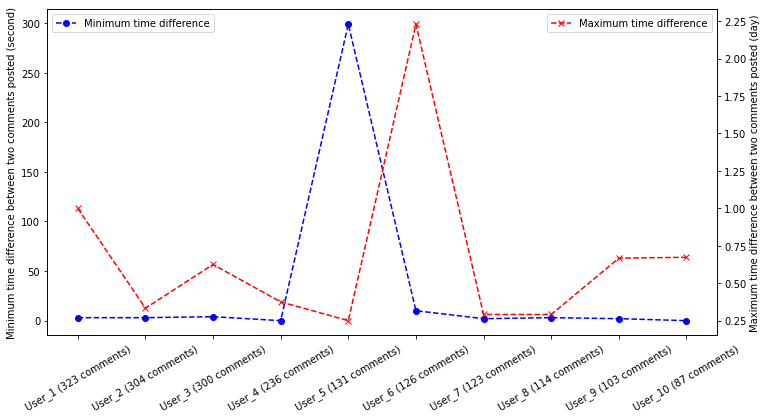

In [31]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

delta_min = df_top_10[['minDelta']]
delta_max = df_top_10[['maxDelta']]/86400
comment_count = df_top_10.commentCount.to_list()
for i in range(len(comment_count)):
    comment_count[i] = "User_" + str(i+1) + " (" + str(comment_count[i]) + " comments)"


fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(111)
# plt.figure(figsize=(12, 6)) 
ax1.plot(delta_min, marker="o", color="blue", label="Minimum time difference", linestyle="--")
# ax1.set_xlabel('Top 10 user posting affiliate URLs')
# plt.ylabel('Minimum time difference between two comments posted (second)')
plt.xticks(range(len(delta_min)), comment_count, rotation = 30)
ax1.set_ylabel('Minimum time difference between two comments posted (second)')

ax2 = ax1.twinx()
ax2.plot(delta_max, marker="x", label = "Maximum time difference", color="red", linestyle="--")
ax2.set_ylabel('Maximum time difference between two comments posted (day)')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.savefig('./figs/twitter_top10_min_max_Delta.pdf', bbox_inches='tight')  # ***bbox_inches='tight'***防止x轴显示不全
plt.show()

发布评论最多的top5用户发布评论的时间间隔统计

In [36]:
df_top_5[['minDelta']]

,minDelta
0,3
1,3
2,4
3,0


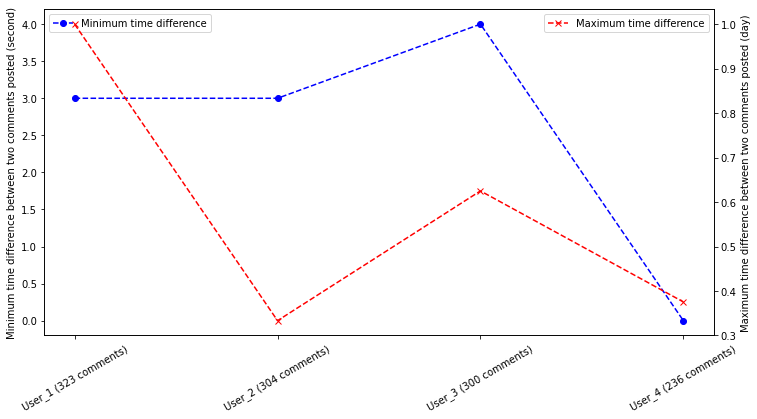

In [35]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

delta_min = df_top_5[['minDelta']]
delta_max = df_top_5[['maxDelta']]/86400
comment_count = df_top_5.commentCount.to_list()
for i in range(len(comment_count)):
    comment_count[i] = "User_" + str(i+1) + " (" + str(comment_count[i]) + " comments)"


fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(111)
# plt.figure(figsize=(12, 6)) 
ax1.plot(delta_min, marker="o", color="blue", label="Minimum time difference", linestyle="--")
# ax1.set_xlabel('Top 10 user posting affiliate URLs')
# plt.ylabel('Minimum time difference between two comments posted (second)')
plt.xticks(range(len(delta_min)), comment_count, rotation = 30)
ax1.set_ylabel('Minimum time difference between two comments posted (second)')

ax2 = ax1.twinx()
ax2.plot(delta_max, marker="x", label = "Maximum time difference", color="red", linestyle="--")
ax2.set_ylabel('Maximum time difference between two comments posted (day)')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.savefig('./figs/twitter_top4_min_max_Delta.pdf', bbox_inches='tight')  # ***bbox_inches='tight'***防止x轴显示不全
plt.show()

In [39]:
df_time_delta.to_csv('./1010/twitter_time_difference.csv', index = False)

In [5]:
# df_twitter = df_twitter.reindex(columns = df_twitter.columns.to_list() + ['affiliate_url_count'])
# df_twitter.affiliate_url_count = 0

In [6]:
# df = pd.read_csv('./1006/twitter_results_0915.csv', engine = 'python')

In [7]:
# twitter_affiliate_url_list = list(set(df[df['isAffiliateLink'] == 1].url.to_list()))

In [8]:
# from tqdm import tqdm
# import ast

# for i in tqdm(range(len(df_twitter))):
#     count = 0
#     for url in ast.literal_eval(df_twitter.loc[i, 'urls']):
#         if url in twitter_affiliate_url_list:
#             count+=1
#     df_twitter.loc[i, 'affiliate_url_count'] = count

100%|██████████| 12298/12298 [00:05<00:00, 2132.66it/s]


In [10]:
# df_twitter.to_csv('./1006/twitter_affiliate_tweets.csv', index = False)